## Coordinate Descent

In [1]:
# Importing necessary libraries
import numpy as np
from tqdm import tqdm
from random import randint
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Data Preprocessing

* Transform 3-class data into binary classification task
* Normalize the data
* Add Bias term
* Transform the label '0' into label '-1'

In [2]:
# Wine Data loading
data = np.loadtxt('./wine.data', delimiter=',')

# tranform into binary classification task
X, y = data[:, 1:], data[:,0]

# tranform into binary classification task
idxs = [i for i in range(len(y)) if y[i] == 1 or y[i] == 2]
        
X, y = X[idxs], y[idxs]

# normalize data
X = (X - X.mean(axis=0))/(X.max(axis=0) - X.min(axis=0))

# Add bias term to the data - making the dimensions from 13 to 14. Now, d = 14
X = np.hstack((X,np.ones(len(X)).reshape(len(X),1)))

# transform target variable
y = np.array(list(map(lambda x: 0 if x == 1 else 1, y))) 

In [3]:
# Convert class 0 to -1
y = np.asarray([-1 if y[i] == 0 else y[i] for i in range(len(y))])

### Benchmark Logistic Regression Loss

We got L* ~ 0.0004

In [4]:
# Benchmark Logistic Regression Model from Sklearn - without regularization

reg = LogisticRegression(solver='liblinear', C=10000000, max_iter = 10000).fit(X,y)
L_star = log_loss(y,reg.predict_proba(X))

print("Loss L* = {:<16f}".format(log_loss(y,reg.predict_proba(X))))

Loss L* = 0.000389        


### Mathematical Functions

* Sigmoid Function
* Loss Function L(w)
* Gradient L'(w) of the Loss Function

In [5]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
# Loss function L(w)
def Lw(X, y, w):
    log_losses = []
    for i in range(X.shape[0]):
        dot = np.dot(w.T, X[i])
        exp_arg = -y[i] * dot
        loss_i = np.log(1+np.exp(exp_arg))
        log_losses.append(loss_i)
    return np.sum(log_losses)

In [7]:
# Gradient of Loss function L(w) of Logistic Regression
def Lw_gradient(X, y, w):
    losses = []
    for i in range(X.shape[0]):
        sig_arg = y[i]*np.dot(w.T, X[i].reshape(14,1))
        sig = sigmoid(-1.0 * sig_arg)
        loss_i = (-y[i] * sig) * X[i]
        losses.append(np.asarray(loss_i).reshape(14,))
    grad = np.sum(np.asarray(losses), axis=0)
    assert grad.shape[0]==14
    return grad

### Our approach - Index with Largest Gradient

In [8]:
# initial weights
w = np.zeros(14).reshape(14,1)
# Adding random noise to weights
w += np.random.normal(0, 0.01, (X.shape[1],1))
w_rand = w

# step-size
eta = 0.01
loss = []
loss_rand = []

# iterations
num_iter = 1000000
for t in tqdm(range(num_iter)):
    grad = Lw_gradient(X, y, w)
    
    largest = np.argmax(np.abs(grad)) # index with largest magnitude
    loss.append(Lw(X, y, w)/130)  
    
    # update scheme - update that coordinate with largest gradient in magnitude
    w[largest] = w[largest] - eta*grad[largest]

print("Loss L = {0}".format(loss[-1]))

100%|██████████| 1000000/1000000 [37:39<00:00, 442.60it/s]

Loss L = 0.00047196485364619373


### Uniformly Random Index Selection

In [9]:
# initial weights
w = np.zeros(14).reshape(14,1)
# Adding random noise to weights
w += np.random.normal(0, 0.01, (X.shape[1],1))
w_rand = w

# step-size
eta = 0.01
loss_rand = []

# iterations
num_iter = 1000000
for t in tqdm(range(num_iter)):
    
    loss_rand.append(Lw(X, y, w)/130)  
    grad = Lw_gradient(X, y, w)
    # random number to select a random index
    random = randint(0,13)
    
    # update scheme - update random coordinate
    w_rand[random] = w_rand[random] - eta*grad[random]

print("Loss L = {0}".format(loss_rand[-1]))

100%|██████████| 1000000/1000000 [37:38<00:00, 442.80it/s]

Loss L = 0.0009403348884440687


### Plot for the three Losses
* L* - Optimum Loss
* Our approach (Best-Gradient) Coordinate Descent
* Random Feature Coordinate Descent

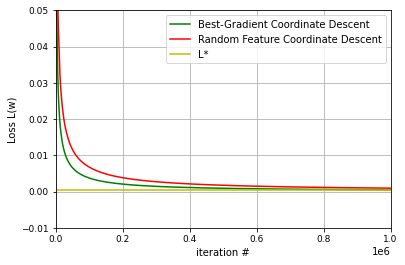

In [13]:
# Plotting the graph
plt.plot(loss, 'g-', label='Best-Gradient Coordinate Descent') # loss best coordinate descent
plt.plot(loss_rand, 'r-', label='Random Feature Coordinate Descent')
plt.axhline(y=L_star, color='y', label='L*')
plt.xlabel('iteration #', fontsize=10)
plt.xlim(0,1000000)
plt.ylim((-0.01,0.05))
plt.ylabel('Loss L(w)', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.grid()
plt.legend()